# Importing Library

In [ ]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.optimizers import Adam
import cv2
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras import applications
from keras.models import Model
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp 'drive/MyDrive/dataset/train.csv' 'train.csv'
!cp 'drive/MyDrive/dataset/test.csv' 'test.csv'


In [ ]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [ ]:
print("training data size is : ",train.shape[0])
print("testing data size is  : ",test.shape[0])

training data size is :  5508
testing data size is  :  2361


In [ ]:
train["breed"].unique()

array(['nerodia-erythrogaster', 'pantherophis-vulpinus',
       'thamnophis-sirtalis', 'pantherophis-obsoletus',
       'agkistrodon-contortrix', 'crotalus-atrox',
       'lampropeltis-triangulum', 'crotalus-horridus', 'crotalus-ruber',
       'heterodon-platirhinos', 'nerodia-sipedon', 'thamnophis-elegans',
       'thamnophis-marcianus', 'crotalus-viridis', 'nerodia-fasciata',
       'haldea-striatula', 'storeria-dekayi', 'agkistrodon-piscivorus',
       'nerodia-rhombifer', 'storeria-occipitomaculata',
       'thamnophis-radix', 'coluber-constrictor', 'natrix-natrix',
       'diadophis-punctatus', 'masticophis-flagellum',
       'pantherophis-spiloides', 'rhinocheilus-lecontei',
       'lampropeltis-californiae', 'pituophis-catenifer',
       'opheodrys-aestivus', 'pantherophis-guttatus',
       'pantherophis-alleghaniensis', 'thamnophis-proximus',
       'pantherophis-emoryi', 'crotalus-scutulatus'], dtype=object)

In [ ]:
train.groupby('breed').count()

,image_id
breed,
agkistrodon-contortrix,206
agkistrodon-piscivorus,147
coluber-constrictor,129
crotalus-atrox,354
crotalus-horridus,142
crotalus-ruber,77
crotalus-scutulatus,63
crotalus-viridis,83
diadophis-punctatus,184


# Visualization of datas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


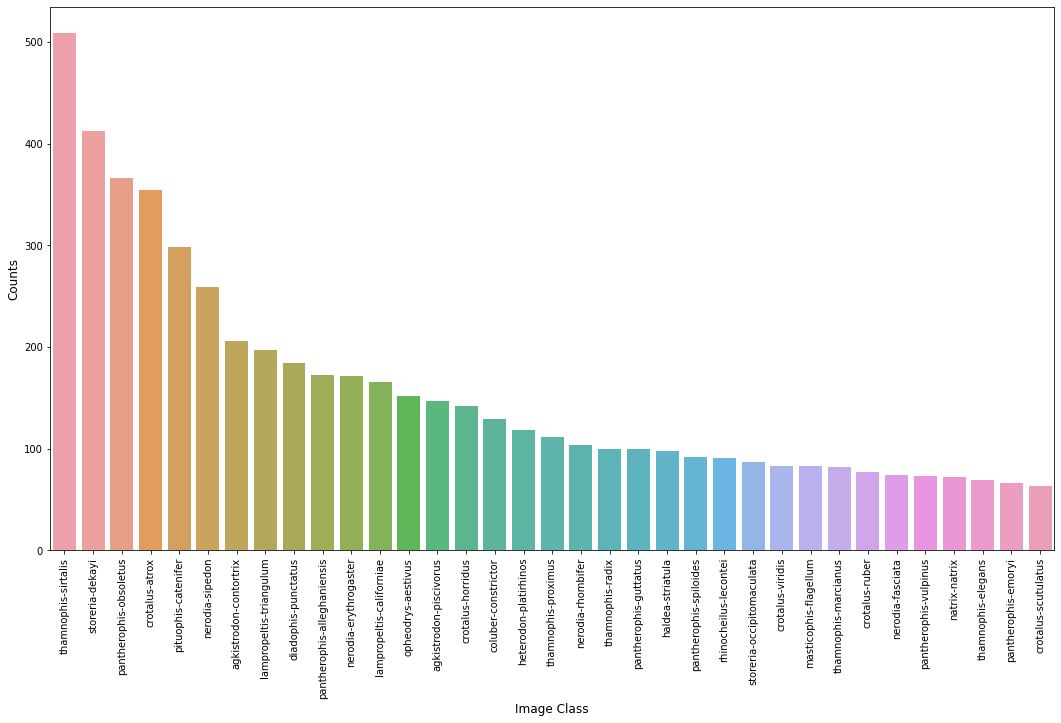

In [ ]:
label_counts = train.breed.value_counts()
plt.figure(figsize = (18,10))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Class', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

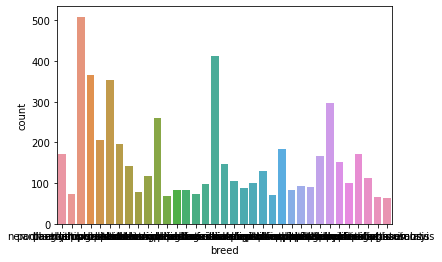

In [ ]:
sns.countplot(x='breed' , data=train)

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/train/'
TEST_PATH = '/content/drive/MyDrive/test/'

In [ ]:
image_path = os.path.join(TRAIN_PATH,'0002023e6f'+'.jpg')

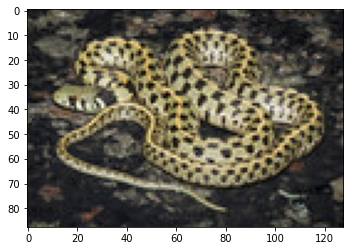

In [ ]:
img = plt.imread(image_path)
plt.imshow(img)
#plt.title('Original Bree --> pantherophis-vulpinus')
plt.show()

In [ ]:
from skimage import io
from skimage.transform import resize
def image_read ( path, img_width = 100,img_height = 100 ):
    
    data = io.imread( path)
    return (resize(data/ 255,(img_width, img_height) ) )

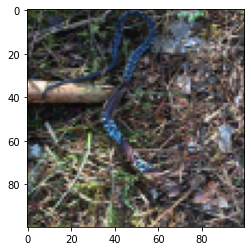

In [ ]:
file_list = os.listdir(TRAIN_PATH)
plt.imshow( image_read ( path = TRAIN_PATH +"/"+file_list[500],
                        img_width = 100,
                        img_height = 100)
           )

# Preparing Datas

In [ ]:
IMG_SIZE = 224 
def read_img(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img , (IMG_SIZE, IMG_SIZE))
    return img

In [ ]:
train_img = []
for img_name in tqdm(train['image_id'].values):
    train_img.append(img_name + '.jpg')

100%|██████████| 5508/5508 [00:00<00:00, 1884972.78it/s]


In [ ]:
train['image'] = train_img
train.head()


,image_id,breed,image
0,a8b3ad1dde,nerodia-erythrogaster,a8b3ad1dde.jpg
1,8b492b973d,pantherophis-vulpinus,8b492b973d.jpg
2,929b99ea92,thamnophis-sirtalis,929b99ea92.jpg
3,bbac7385e2,pantherophis-obsoletus,bbac7385e2.jpg
4,ef776b1488,agkistrodon-contortrix,ef776b1488.jpg


In [ ]:
train_img = []
for img_name in tqdm(train['image'].values):
    train_img.append(read_img(TRAIN_PATH + img_name ))

100%|██████████| 5508/5508 [30:07<00:00,  3.05it/s]


In [ ]:
x_train = np.array(train_img, np.float32) / 255

**np.array** is used to covert an image to 3D array format

In [ ]:
x_train.shape[0]

5508

In [ ]:
print(x_train.shape)

(5508, 224, 224, 3)


In [ ]:
label_list = train['breed'].tolist()
label_numeric = {k: v+1 for v, k in enumerate(set(label_list))}
y_train = [label_numeric[k] for k in label_list]
y_train = np.array(y_train)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [ ]:
print(y_train.shape)

(5508, 36)


In [ ]:
!pip install keras.applications

     |████████████████████████████████| 50 kB 4.9 MB/s 


In [ ]:
pip list |grep Keras

Keras                         2.4.3
Keras-Applications            1.0.8
Keras-Preprocessing           1.1.2


# Model Building

In [ ]:
from keras import applications
#from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input,decode_predictions
#base_model = applications.resnet50.ResNet50(weights="imagenet",  include_top= False, input_shape=(224, 224, 3))

base_model =   applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

#img_rows, img_cols, img_channel = 48, 48, 3
#base_model = keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))
#add_model = Sequential()
#add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
#add_model.add(Dense(4, activation='sigmoid'))
#model_ResNet50V2 = Model(inputs=base_model.input, outputs=add_model(base_model.output))
#model_ResNet50V2.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
#metrics=['accuracy'])
#model_ResNet50V2.summary()
#model_ResNet50V2.fit(images_train, train_labels, epochs=10, validation_data=(images_val, val_labels), batch_size=128)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
## set model architechture 
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dropout(0.3))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dropout(0.3))
add_model.add(Dense(128, activation='relu'))
add_model.add(Dropout(0.3))
add_model.add(Dense(y_train.shape[1], activation='softmax'))


model = Model(inputs=base_model.input, outputs=add_model(base_model.output))


model.summary()

#model = Model(inputs=add_model(base_model.input), outputs=add_model(base_model.output))
#load_modelo
#model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),metrics=['accuracy'])
#add_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),metrics=['accuracy'])
    
  #loss='categorical_crossentropy', optimizer= "adam",metrics=['accuracy'])

#add_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import RMSprop
#optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.0005)
#model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001), metrics=['acc'])
#model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=0.001, momentum=0.9),metrics=['accuracy'])

In [ ]:
batch_size = 32      
epochs = 50                

train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1, 
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_datagen.fit(x_train)

***Image augmentation*** is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.

In [ ]:
history = model.fit( train_datagen.flow(x_train, y_train, batch_size=batch_size),
                               steps_per_epoch=x_train.shape[0] // batch_size,
                               epochs=epochs)
#.flow(x_train, y_train , batch_size=60)
#//x_train.shape[0]
#history = model.fit_generator( train_datagen.flow(x_train, y_train, batch_size=batch_size),
 #                              steps_per_epoch=x_train.shape[0] // batch_size,
  #                             epochs=epochs)

Epoch 1/50
172/172 [==============================] - 114s 452ms/step - loss: 3.9638 - accuracy: 0.0482
Epoch 2/50
172/172 [==============================] - 78s 451ms/step - loss: 3.5087 - accuracy: 0.0814
Epoch 3/50
172/172 [==============================] - 77s 446ms/step - loss: 3.4141 - accuracy: 0.1123
Epoch 4/50
172/172 [==============================] - 77s 446ms/step - loss: 3.3331 - accuracy: 0.1324
Epoch 5/50
172/172 [==============================] - 77s 446ms/step - loss: 3.2456 - accuracy: 0.1549
Epoch 6/50
172/172 [==============================] - 78s 455ms/step - loss: 3.1560 - accuracy: 0.1744
Epoch 7/50
172/172 [==============================] - 77s 448ms/step - loss: 3.0755 - accuracy: 0.1972
Epoch 8/50
172/172 [==============================] - 78s 451ms/step - loss: 3.0220 - accuracy: 0.2078
Epoch 9/50
172/172 [==============================] - 79s 458ms/step - loss: 2.9737 - accuracy: 0.2279
Epoch 10/50
172/172 [==============================] - 78s 451ms/step - 

# Checking Accuracy

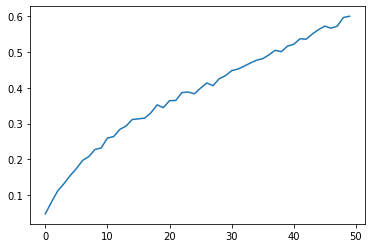

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])

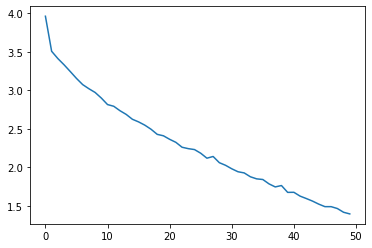

In [ ]:
plt.plot(history.history['loss'])

# Testing  Datas

In [ ]:
test_img = []
for img_name in tqdm(test['image_id'].values):
    test_img.append(img_name + '.jpg')

100%|██████████| 2361/2361 [00:00<00:00, 1477581.58it/s]


In [ ]:
test['image'] = test_img

test_img = []
for img_name in tqdm(test['image'].values): 
    test_img.append(read_img(TEST_PATH + img_name))
    

100%|██████████| 2361/2361 [13:06<00:00,  3.00it/s]


In [ ]:
x_test = np.array(test_img, np.float32) / 255

# Model Prediction

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions = np.argmax(predictions, axis=1)
rev_y = {v:k for k,v in label_numeric.items()}
pred_labels = [rev_y[k] for k in predictions]

In [ ]:
output = pd.DataFrame({'image_id': test.image_id, 'breed': pred_labels})
filename = 'solution.csv'
output.to_csv(filename, index=False) 
output.head(20)

,image_id,breed
0,7ede553357,pantherophis-obsoletus
1,3500b219e4,agkistrodon-piscivorus
2,d43a78d6d9,pituophis-catenifer
3,1f36f26994,pantherophis-guttatus
4,8cb85fc58e,storeria-dekayi
5,7176bcfe9a,lampropeltis-triangulum
6,27f2d0f582,storeria-dekayi
7,43eebba928,thamnophis-sirtalis
8,180a56f143,nerodia-sipedon
9,07fd20e8bd,agkistrodon-piscivorus
